In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
#import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
#Components used for signal - ACF,PSD
import scipy.signal

In [59]:
# Getting current working directory and storing it as a string variable and reading all empty seat readings into one dataframe

directory_in_str = "E:\\Haritha\\MasterThesis\\ModelTraining\\aa_measurements\\FFTfilegenerationpurpose\\Part8"
Emptyfilelist = []
empty = pd.DataFrame()
print("Adding the following files : ")
for file in os.listdir(directory_in_str) :
    if file.startswith("adc_empty") :
        print(file)
        filepathempty = directory_in_str +"\\" + file
        df1 = pd.read_csv(filepathempty, sep = '\t', engine = 'python', header = None)
        empty  = empty.append(df1)
    else :
        continue  
 
empty["Label"] = 0
empty.head()

Adding the following files : 
adc_empty116_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_14428\565294587.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty117.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_14428\565294587.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


,0,1,2,3,4,5,6,7,8,9,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,Label
0,64,32768,1,1,512,0,1953125,12,0.0,0,...,-147,-147,-145,-144,-144,-147,-149,-148,-147,0
1,64,32768,1,1,512,0,1953125,12,0.0,0,...,-147,-147,-145,-144,-144,-147,-149,-148,-147,0
2,64,32768,1,1,512,0,1953125,12,0.0,0,...,-152,-152,-148,-147,-142,-140,-141,-138,-134,0
3,64,32768,1,1,512,0,1953125,12,0.0,0,...,-152,-152,-148,-147,-142,-140,-141,-138,-134,0
4,64,32768,1,1,512,0,1953125,12,0.0,0,...,-146,-144,-145,-146,-143,-144,-146,-140,-137,0


In [60]:
# Empty seat Data ingest
empty.reset_index(inplace = True)

#Dropping anomalies
empty.drop(empty[empty.iloc[:,10]>=0.41].index,inplace = True)

#Index given is 16, as iloc uses n-1 as the end limit for 0:16 
empty.drop(empty.iloc[:,0:17] ,axis=1,inplace=True)
#empty = empty.T
empty.head()


,16,17,18,19,20,21,22,23,24,25,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,Label
0,-127,-125,-126,-124,-372,-332,-276,-219,-156,-98,...,-147,-147,-145,-144,-144,-147,-149,-148,-147,0
1,-148,-151,-154,-272,-199,-131,-63,7,69,128,...,-147,-147,-145,-144,-144,-147,-149,-148,-147,0
2,-144,-143,-137,-135,-134,-406,-374,-331,-279,-222,...,-152,-152,-148,-147,-142,-140,-141,-138,-134,0
3,-133,-135,-134,-129,-129,-132,-351,-419,-489,-551,...,-152,-152,-148,-147,-142,-140,-141,-138,-134,0
4,-132,-132,-131,-221,-159,-98,-43,0,35,76,...,-146,-144,-145,-146,-143,-144,-146,-140,-137,0


In [61]:
# Reading all baby seat readings into one dataframe

baby = pd.DataFrame()
print("Adding the following files : ")
for file in os.listdir(directory_in_str) :
    if file.startswith("adc_baby") :
        print(file)
        filepathbaby = directory_in_str +"\\" +file
        df2 = pd.read_csv(filepathbaby, sep = '\t', engine = 'python',header = None)
        baby  = baby.append(df2)
    else :
        continue 

baby["Label"] = 1
baby.head()

Adding the following files : 
adc_baby116_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_14428\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby117.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_14428\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


,0,1,2,3,4,5,6,7,8,9,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,Label
0,64,32768,1,1,512,0,1953125,12,0.0,0,...,-168,-166,-167,-170,-168,-168,-164,-161,-166,1
1,64,32768,1,1,512,0,1953125,12,0.0,0,...,-168,-166,-167,-170,-168,-168,-164,-161,-166,1
2,64,32768,1,1,512,0,1953125,12,0.0,0,...,-138,-144,-149,-151,-160,-163,-166,-164,-164,1
3,64,32768,1,1,512,0,1953125,12,0.0,0,...,-161,-162,-165,-168,-171,-169,-170,-172,-177,1
4,64,32768,1,1,512,0,1953125,12,0.0,0,...,-121,-124,-132,-132,-134,-131,-127,-129,-133,1


In [62]:
#Dropping anomalies
baby.drop(baby[baby.iloc[:,10]>=0.41].index,inplace = True)
baby.reset_index(inplace = True)

#Index given is 16, as iloc uses n-1 as the end limit for 0:16 
# Baby seat Data ingest and attach Label = 1

baby.drop(baby.iloc[:,0:17] ,axis=1,inplace=True)
#baby = baby.T
baby.head()

,16,17,18,19,20,21,22,23,24,25,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,Label
0,-127,-129,-120,-116,-123,-46,-92,-151,-205,-262,...,-168,-166,-167,-170,-168,-168,-164,-161,-166,1
1,-162,-158,-153,-192,-138,-85,-29,15,43,77,...,-168,-166,-167,-170,-168,-168,-164,-161,-166,1
2,-119,-116,-115,-110,-110,-112,-678,-657,-617,-567,...,-138,-144,-149,-151,-160,-163,-166,-164,-164,1
3,-175,-174,-443,-421,-398,-367,-330,-285,-227,-166,...,-161,-162,-165,-168,-171,-169,-170,-172,-177,1
4,-136,-138,-141,-141,-145,-150,-151,-150,-155,82,...,-121,-124,-132,-132,-134,-131,-127,-129,-133,1


In [63]:
total = pd.concat([empty,baby],ignore_index=True)
total.reset_index(drop=True,inplace=True)
total

,16,17,18,19,20,21,22,23,24,25,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,Label
0,-127,-125,-126,-124,-372,-332,-276,-219,-156,-98,...,-147,-147,-145,-144,-144,-147,-149,-148,-147,0
1,-148,-151,-154,-272,-199,-131,-63,7,69,128,...,-147,-147,-145,-144,-144,-147,-149,-148,-147,0
2,-144,-143,-137,-135,-134,-406,-374,-331,-279,-222,...,-152,-152,-148,-147,-142,-140,-141,-138,-134,0
3,-133,-135,-134,-129,-129,-132,-351,-419,-489,-551,...,-152,-152,-148,-147,-142,-140,-141,-138,-134,0
4,-132,-132,-131,-221,-159,-98,-43,0,35,76,...,-146,-144,-145,-146,-143,-144,-146,-140,-137,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,-149,-152,-150,-152,-148,86,126,155,173,173,...,-146,-148,-149,-147,-147,-149,-150,-156,-156,1
596,-155,-152,-151,-275,-330,-383,-427,-458,-478,-489,...,-146,-148,-149,-147,-147,-149,-150,-156,-156,1
597,-151,-153,-150,-484,-487,-482,-466,-451,-431,-402,...,-153,-146,-143,-146,-145,-143,-142,-143,-142,1
598,-147,-150,-153,-466,-444,-421,-388,-344,-295,-234,...,-153,-146,-143,-146,-145,-143,-142,-143,-142,1


In [64]:
total["Mean"]=total.iloc[:,0:16384].mean(axis=1)
temp = total["Mean"]
total.head()

,16,17,18,19,20,21,22,23,24,25,...,16392,16393,16394,16395,16396,16397,16398,16399,Label,Mean
0,-127,-125,-126,-124,-372,-332,-276,-219,-156,-98,...,-147,-145,-144,-144,-147,-149,-148,-147,0,-148.507996
1,-148,-151,-154,-272,-199,-131,-63,7,69,128,...,-147,-145,-144,-144,-147,-149,-148,-147,0,-145.947083
2,-144,-143,-137,-135,-134,-406,-374,-331,-279,-222,...,-152,-148,-147,-142,-140,-141,-138,-134,0,-146.107971
3,-133,-135,-134,-129,-129,-132,-351,-419,-489,-551,...,-152,-148,-147,-142,-140,-141,-138,-134,0,-141.607788
4,-132,-132,-131,-221,-159,-98,-43,0,35,76,...,-144,-145,-146,-143,-144,-146,-140,-137,0,-147.472595


In [65]:
totalidxnew = total.iloc[:,0:16384]
totalidxnew

,16,17,18,19,20,21,22,23,24,25,...,16390,16391,16392,16393,16394,16395,16396,16397,16398,16399
0,-127,-125,-126,-124,-372,-332,-276,-219,-156,-98,...,-149,-147,-147,-145,-144,-144,-147,-149,-148,-147
1,-148,-151,-154,-272,-199,-131,-63,7,69,128,...,-149,-147,-147,-145,-144,-144,-147,-149,-148,-147
2,-144,-143,-137,-135,-134,-406,-374,-331,-279,-222,...,-152,-152,-152,-148,-147,-142,-140,-141,-138,-134
3,-133,-135,-134,-129,-129,-132,-351,-419,-489,-551,...,-152,-152,-152,-148,-147,-142,-140,-141,-138,-134
4,-132,-132,-131,-221,-159,-98,-43,0,35,76,...,-147,-146,-144,-145,-146,-143,-144,-146,-140,-137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,-149,-152,-150,-152,-148,86,126,155,173,173,...,-147,-146,-148,-149,-147,-147,-149,-150,-156,-156
596,-155,-152,-151,-275,-330,-383,-427,-458,-478,-489,...,-147,-146,-148,-149,-147,-147,-149,-150,-156,-156
597,-151,-153,-150,-484,-487,-482,-466,-451,-431,-402,...,-152,-153,-146,-143,-146,-145,-143,-142,-143,-142
598,-147,-150,-153,-466,-444,-421,-388,-344,-295,-234,...,-152,-153,-146,-143,-146,-145,-143,-142,-143,-142


In [66]:
totalfresh = totalidxnew.sub(temp, axis=0)
totalfresh.head()

,16,17,18,19,20,21,22,23,24,25,...,16390,16391,16392,16393,16394,16395,16396,16397,16398,16399
0,21.507996,23.507996,22.507996,24.507996,-223.492004,-183.492004,-127.492004,-70.492004,-7.492004,50.507996,...,-0.492004,1.507996,1.507996,3.507996,4.507996,4.507996,1.507996,-0.492004,0.507996,1.507996
1,-2.052917,-5.052917,-8.052917,-126.052917,-53.052917,14.947083,82.947083,152.947083,214.947083,273.947083,...,-3.052917,-1.052917,-1.052917,0.947083,1.947083,1.947083,-1.052917,-3.052917,-2.052917,-1.052917
2,2.107971,3.107971,9.107971,11.107971,12.107971,-259.892029,-227.892029,-184.892029,-132.892029,-75.892029,...,-5.892029,-5.892029,-5.892029,-1.892029,-0.892029,4.107971,6.107971,5.107971,8.107971,12.107971
3,8.607788,6.607788,7.607788,12.607788,12.607788,9.607788,-209.392212,-277.392212,-347.392212,-409.392212,...,-10.392212,-10.392212,-10.392212,-6.392212,-5.392212,-0.392212,1.607788,0.607788,3.607788,7.607788
4,15.472595,15.472595,16.472595,-73.527405,-11.527405,49.472595,104.472595,147.472595,182.472595,223.472595,...,0.472595,1.472595,3.472595,2.472595,1.472595,4.472595,3.472595,1.472595,7.472595,10.472595


In [67]:
total2 = pd.DataFrame()
total2 = totalfresh.iloc[:,0:16384]
total2.reset_index(drop=True,inplace=True)
total2.head()

,16,17,18,19,20,21,22,23,24,25,...,16390,16391,16392,16393,16394,16395,16396,16397,16398,16399
0,21.507996,23.507996,22.507996,24.507996,-223.492004,-183.492004,-127.492004,-70.492004,-7.492004,50.507996,...,-0.492004,1.507996,1.507996,3.507996,4.507996,4.507996,1.507996,-0.492004,0.507996,1.507996
1,-2.052917,-5.052917,-8.052917,-126.052917,-53.052917,14.947083,82.947083,152.947083,214.947083,273.947083,...,-3.052917,-1.052917,-1.052917,0.947083,1.947083,1.947083,-1.052917,-3.052917,-2.052917,-1.052917
2,2.107971,3.107971,9.107971,11.107971,12.107971,-259.892029,-227.892029,-184.892029,-132.892029,-75.892029,...,-5.892029,-5.892029,-5.892029,-1.892029,-0.892029,4.107971,6.107971,5.107971,8.107971,12.107971
3,8.607788,6.607788,7.607788,12.607788,12.607788,9.607788,-209.392212,-277.392212,-347.392212,-409.392212,...,-10.392212,-10.392212,-10.392212,-6.392212,-5.392212,-0.392212,1.607788,0.607788,3.607788,7.607788
4,15.472595,15.472595,16.472595,-73.527405,-11.527405,49.472595,104.472595,147.472595,182.472595,223.472595,...,0.472595,1.472595,3.472595,2.472595,1.472595,4.472595,3.472595,1.472595,7.472595,10.472595


In [68]:
total2["Label"] =  total["Label"]
total2

C:\Users\Vinoth\AppData\Local\Temp\ipykernel_14428\891580039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total2["Label"] =  total["Label"]


,16,17,18,19,20,21,22,23,24,25,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,Label
0,21.507996,23.507996,22.507996,24.507996,-223.492004,-183.492004,-127.492004,-70.492004,-7.492004,50.507996,...,1.507996,1.507996,3.507996,4.507996,4.507996,1.507996,-0.492004,0.507996,1.507996,0
1,-2.052917,-5.052917,-8.052917,-126.052917,-53.052917,14.947083,82.947083,152.947083,214.947083,273.947083,...,-1.052917,-1.052917,0.947083,1.947083,1.947083,-1.052917,-3.052917,-2.052917,-1.052917,0
2,2.107971,3.107971,9.107971,11.107971,12.107971,-259.892029,-227.892029,-184.892029,-132.892029,-75.892029,...,-5.892029,-5.892029,-1.892029,-0.892029,4.107971,6.107971,5.107971,8.107971,12.107971,0
3,8.607788,6.607788,7.607788,12.607788,12.607788,9.607788,-209.392212,-277.392212,-347.392212,-409.392212,...,-10.392212,-10.392212,-6.392212,-5.392212,-0.392212,1.607788,0.607788,3.607788,7.607788,0
4,15.472595,15.472595,16.472595,-73.527405,-11.527405,49.472595,104.472595,147.472595,182.472595,223.472595,...,1.472595,3.472595,2.472595,1.472595,4.472595,3.472595,1.472595,7.472595,10.472595,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1.859070,-1.140930,0.859070,-1.140930,2.859070,236.859070,276.859070,305.859070,323.859070,323.859070,...,4.859070,2.859070,1.859070,3.859070,3.859070,1.859070,0.859070,-5.140930,-5.140930,1
596,-7.265381,-4.265381,-3.265381,-127.265381,-182.265381,-235.265381,-279.265381,-310.265381,-330.265381,-341.265381,...,1.734619,-0.265381,-1.265381,0.734619,0.734619,-1.265381,-2.265381,-8.265381,-8.265381,1
597,-5.616577,-7.616577,-4.616577,-338.616577,-341.616577,-336.616577,-320.616577,-305.616577,-285.616577,-256.616577,...,-7.616577,-0.616577,2.383423,-0.616577,0.383423,2.383423,3.383423,2.383423,3.383423,1
598,-1.098145,-4.098145,-7.098145,-320.098145,-298.098145,-275.098145,-242.098145,-198.098145,-149.098145,-88.098145,...,-7.098145,-0.098145,2.901855,-0.098145,0.901855,2.901855,3.901855,2.901855,3.901855,1


In [69]:
windowtorawadcdatalength = 16384
windowtorawadcdatalength

16384

In [70]:
adcwindow = np.hamming(windowtorawadcdatalength)
adcwindow

array([0.08      , 0.08000003, 0.08000014, ..., 0.08000014, 0.08000003,
       0.08      ])

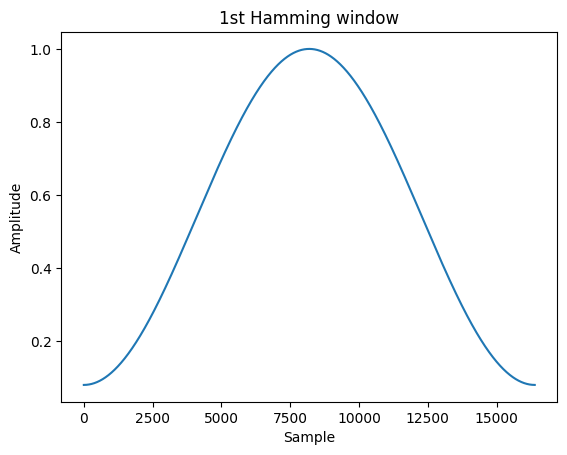

In [41]:
plt.plot(adcwindow) 
plt.title("1st Hamming window")
plt.ylabel("Amplitude") 
plt.xlabel("Sample") 
plt.show() 

In [71]:
windowedadcsignal = total2.iloc[:,0:16384] * adcwindow
#plt.plot(windowedadcsignal.iloc[80,:])

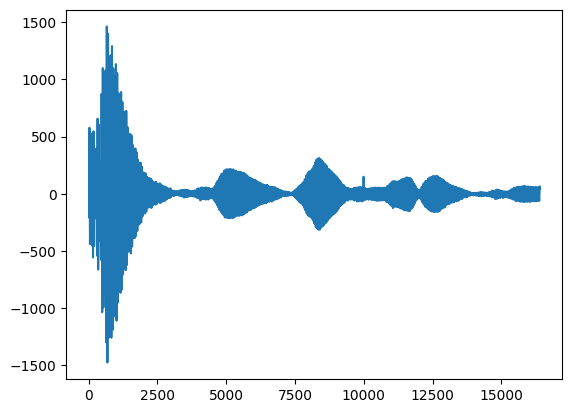

In [21]:
plt.plot(total2.iloc[80,0:16384])

In [72]:
lengthvar = len(total2)
lengthvar

600

In [73]:
positiveacf = pd.DataFrame(acf(windowedadcsignal.iloc[i,0:16384], nlags = 16383) 
                   for i in range(lengthvar)
                  )

In [74]:
positiveacf["Label"] = total2["Label"]

In [75]:
positiveacf

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,Label
0,1.0,0.990981,0.964788,0.921973,0.863305,0.789754,0.702606,0.603307,0.493629,0.375447,...,-5.368581e-08,3.143525e-08,4.779412e-08,9.051896e-09,-8.743240e-09,-8.282561e-10,-1.991758e-09,7.188895e-10,1.259764e-09,0
1,1.0,0.990951,0.964640,0.921619,0.862632,0.788660,0.700997,0.601109,0.490795,0.371924,...,-1.320513e-07,-5.785612e-08,2.459608e-08,6.261077e-08,5.219454e-08,3.097608e-08,4.837225e-09,2.155086e-09,6.338292e-10,0
2,1.0,0.990934,0.964632,0.921636,0.862688,0.788761,0.701153,0.601347,0.491114,0.372330,...,-7.311007e-07,-6.447310e-07,-5.383500e-07,-3.143324e-07,5.180074e-08,3.995148e-08,2.626310e-08,1.330818e-08,6.882793e-09,0
3,1.0,0.991120,0.965315,0.923110,0.865238,0.792666,0.706686,0.608691,0.500446,0.383800,...,3.534577e-06,2.268588e-06,1.277168e-06,5.621608e-07,4.527293e-07,3.638750e-07,2.780507e-07,1.760431e-07,7.997546e-08,0
4,1.0,0.990951,0.964626,0.921580,0.862564,0.788543,0.700820,0.600862,0.490455,0.371498,...,3.607980e-07,2.332076e-07,1.396905e-07,4.891115e-08,-4.725731e-08,-5.077312e-08,3.726263e-08,3.172125e-08,1.813857e-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1.0,0.991078,0.965091,0.922596,0.864299,0.791176,0.704501,0.605728,0.496616,0.379014,...,5.540517e-08,-2.431903e-08,-7.421288e-08,-3.335491e-08,2.449252e-09,1.083183e-09,3.397901e-10,-9.897690e-10,-7.262488e-10,1
596,1.0,0.991041,0.964883,0.922068,0.863344,0.789667,0.702345,0.602821,0.492858,0.374322,...,5.398393e-07,4.803555e-07,4.039223e-07,3.046819e-07,2.045990e-07,8.911324e-08,8.688850e-09,9.192001e-09,5.567284e-09,1
597,1.0,0.991054,0.964915,0.922094,0.863360,0.789679,0.702331,0.602770,0.492767,0.374205,...,1.701552e-08,-5.073715e-08,-8.869412e-08,-7.880515e-08,-4.669043e-08,-3.623919e-08,-1.751578e-09,-1.223437e-09,-7.678501e-10,1
598,1.0,0.991053,0.964914,0.922116,0.863374,0.789710,0.702390,0.602848,0.492877,0.374353,...,-3.284890e-07,-3.553540e-07,-3.492612e-07,-2.877193e-07,-1.928149e-07,-1.123583e-07,-2.875134e-09,-1.022642e-09,4.970286e-12,1


In [47]:
positiveacf.to_csv('WindowedsignalACF-Part9.csv', encoding='utf-8',index=False)

In [76]:
#Reversing the dataframe to get the negative ACF portion
negativeacf = positiveacf[positiveacf.columns[::-1]]

#Deleting the last column (corresponding to lag =0) as it is already present in the positive portion of the ACF
negativeacf = negativeacf.iloc[: , :-1]

In [49]:
negativeacf

,Label,16383,16382,16381,16380,16379,16378,16377,16376,16375,...,10,9,8,7,6,5,4,3,2,1
0,0,8.873563e-10,-2.587527e-09,-5.383676e-09,-1.926313e-09,1.450337e-07,1.918950e-07,2.058662e-07,2.577373e-07,3.085130e-07,...,0.254670,0.378650,0.496213,0.605251,0.703937,0.790454,0.863496,0.921798,0.964473,0.990747
1,0,5.409687e-09,9.232945e-09,7.813202e-09,-2.332252e-07,-4.809594e-07,-5.930278e-07,-5.751992e-07,-6.533391e-07,-5.393439e-07,...,0.254757,0.378757,0.496311,0.605284,0.703920,0.790428,0.863455,0.921725,0.964398,0.990709
2,0,1.104425e-10,-1.511352e-09,2.458676e-08,5.854601e-08,1.152365e-07,2.084168e-07,2.866896e-07,3.615600e-07,4.256116e-07,...,0.255111,0.379105,0.496595,0.605557,0.704177,0.790651,0.863655,0.921932,0.964565,0.990778
3,0,1.296264e-09,5.773655e-10,8.337570e-09,6.207318e-08,1.363441e-08,-3.465221e-08,-1.761208e-07,-4.245912e-07,-7.453648e-07,...,0.253659,0.377297,0.494583,0.603412,0.702026,0.788656,0.861925,0.920552,0.963602,0.990277
4,0,-2.989903e-09,-6.465543e-09,-7.273652e-09,1.736898e-07,3.478916e-07,3.179493e-07,2.159118e-07,2.416244e-07,5.158691e-07,...,0.255239,0.379142,0.496555,0.605487,0.704026,0.790465,0.863424,0.921653,0.964228,0.990417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,5.068449e-08,9.348945e-08,1.484914e-07,7.630127e-07,1.313394e-06,2.042585e-06,2.770655e-06,3.741118e-06,5.128450e-06,...,0.320239,0.433336,0.540524,0.639874,0.729819,0.808669,0.875223,0.928362,0.967314,0.991411
396,1,-3.055452e-09,-5.887149e-09,-8.518539e-09,-2.077844e-07,-2.670084e-07,-3.828770e-07,-4.837902e-07,-5.720219e-07,-5.132267e-07,...,0.255992,0.379785,0.497091,0.605819,0.704231,0.790537,0.863409,0.921569,0.964213,0.990589
397,1,3.197741e-09,2.304898e-09,-3.867182e-07,-8.634890e-07,-1.145918e-06,-1.143083e-06,-1.035646e-06,-8.328409e-07,-6.798489e-07,...,0.255793,0.379582,0.496888,0.605620,0.704009,0.790268,0.863068,0.921199,0.963863,0.990266
398,1,9.665653e-09,1.200717e-08,1.966087e-08,3.110147e-07,2.800644e-07,1.926637e-07,2.664360e-07,2.349785e-07,7.245653e-08,...,0.255801,0.379560,0.496873,0.605663,0.704153,0.790494,0.863376,0.921573,0.964238,0.990616


In [77]:
wholeacfsignal = pd.concat([negativeacf, positiveacf], axis=1)
wholeacfsignal.columns = range(wholeacfsignal.columns.size)

In [78]:
wholeacfsignal.iloc[:,1:32768].shape

(600, 32767)

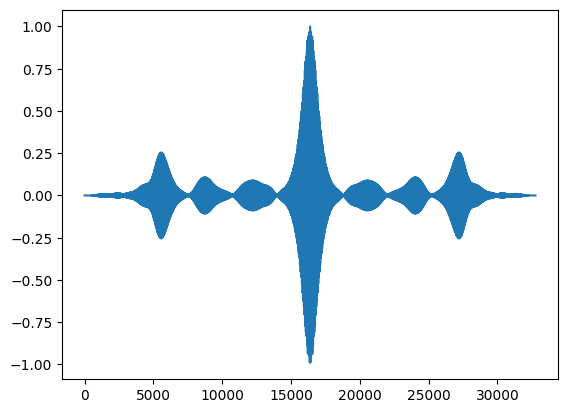

In [250]:
plt.plot(wholeacfsignal.iloc[0,:])

In [79]:
from numpy.fft import fft, ifft

X_fft = np.fft.fft(wholeacfsignal.iloc[:,1:32768])
N = 32768
X_fftmagpsd = np.abs(X_fft)/N

#X_fftb = np.fft.fft(wholeacfsignal)
#N = 16384
#X_fftmagb = np.abs(X_fftb)/N

X_fftpsd = pd.DataFrame(X_fftmagpsd)
#X_fftmagb = pd.DataFrame(X_fftmagb)

In [80]:
X_fftpsdtemp = pd.DataFrame()
X_fftpsdtemp = X_fftpsdtemp.append(X_fftpsd.iloc[:,600:1000])

C:\Users\Vinoth\AppData\Local\Temp\ipykernel_14428\3847118609.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_fftpsdtemp = X_fftpsdtemp.append(X_fftpsd.iloc[:,600:1000])


In [81]:
X_fftpsdtemp["Label"] = total2["Label"]
X_fftpsdtemp

,600,601,602,603,604,605,606,607,608,609,...,991,992,993,994,995,996,997,998,999,Label
0,7.742233e-06,7.145376e-06,9.813837e-06,5.560825e-06,7.860488e-06,1.122834e-05,6.895345e-06,1.076116e-05,1.090322e-05,5.185406e-06,...,4.565802e-07,1.161924e-06,3.998647e-08,1.006968e-06,7.488467e-07,1.643854e-07,1.187145e-06,3.233038e-07,3.558473e-07,0
1,4.358726e-07,7.725483e-08,4.202040e-07,7.231326e-07,8.974804e-07,2.789087e-07,2.607877e-07,1.120916e-06,2.036639e-06,1.316065e-06,...,1.635005e-07,2.534602e-07,2.170503e-07,5.592813e-07,5.731866e-07,6.818911e-08,2.567487e-07,4.751574e-07,5.825655e-08,0
2,1.022227e-06,2.153537e-06,3.486598e-06,2.147073e-06,1.023395e-06,8.295161e-07,6.261955e-08,8.829577e-07,2.965020e-06,2.623383e-06,...,3.725732e-07,2.224639e-07,1.461999e-06,1.807294e-06,6.350034e-07,3.949003e-08,3.893550e-07,9.472935e-07,9.484296e-07,0
3,1.637028e-07,3.007006e-08,2.940325e-08,7.698056e-08,2.528722e-07,2.966358e-08,3.965620e-07,9.511816e-07,4.989182e-07,1.028435e-07,...,4.151430e-07,2.104539e-07,5.723544e-07,5.048066e-07,2.235335e-07,3.138681e-07,3.509174e-08,5.175886e-07,8.885823e-07,0
4,2.167765e-07,1.965930e-07,2.523158e-07,7.420768e-08,2.081057e-07,2.375798e-07,3.382416e-07,2.067918e-07,1.353112e-07,1.039942e-07,...,1.532872e-07,2.370307e-07,4.450451e-07,5.335200e-07,2.499441e-07,5.506314e-08,6.027083e-08,3.652733e-07,2.652358e-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1.999038e-06,1.315614e-06,1.108753e-06,3.679632e-06,2.008600e-06,1.334917e-06,1.636414e-06,8.207173e-07,3.646451e-06,4.949692e-06,...,8.024773e-07,1.327854e-06,1.471213e-07,4.789550e-07,3.498279e-07,4.549428e-08,3.419440e-07,5.524632e-08,4.976413e-07,1
596,7.915984e-08,4.698681e-08,2.600556e-07,3.461777e-07,3.234931e-07,3.057119e-07,5.554488e-08,3.544530e-07,1.298987e-06,9.207635e-07,...,1.354430e-07,1.075694e-07,8.076810e-08,1.525384e-07,6.740095e-08,8.186810e-08,2.161582e-07,3.496657e-08,7.083773e-08,1
597,1.384871e-07,1.454707e-07,2.025050e-07,9.689876e-07,5.088398e-07,5.969657e-08,1.443042e-07,5.973001e-08,9.024580e-07,8.489212e-07,...,8.373520e-08,1.099885e-07,1.003815e-07,1.327428e-07,3.685389e-07,2.958216e-07,1.363374e-08,1.854605e-07,4.273463e-07,1
598,1.924981e-08,4.237954e-07,6.280440e-07,2.168986e-07,1.459160e-07,1.494545e-07,4.553851e-09,2.377153e-07,4.501592e-07,3.210807e-07,...,3.735433e-07,4.216572e-07,6.144714e-08,2.022425e-07,4.738823e-07,1.210441e-07,6.995958e-08,1.353433e-07,9.490598e-08,1


In [82]:
X_fftpsdtemp.to_csv('PSDfromWindowedADC-Part8.csv', encoding='utf-8',index=False)

In [27]:
#Sampling frequency
Fs = 1953125
#Number of samples
N = 32767

#Spectrum only plotted for half of spectrum, thus N/2
f1 = np.linspace(0, 16383*(Fs/N), int(N/2))
f2 = np.linspace(0,8192*(Fs/(N/2)), int(N/4))

#f = f.reshape((1, -1)) 
#f.shape

In [28]:
f1.shape

(16383,)

In [130]:
f2.shape

(8191,)

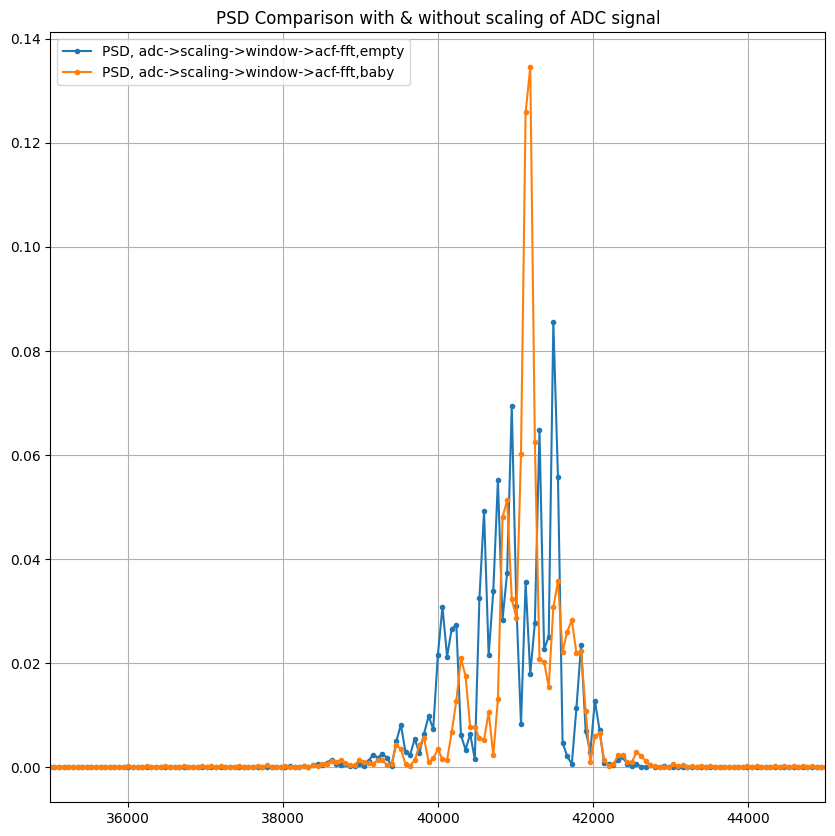

In [318]:
plt.figure(figsize=(10,10))
#plt.plot(f2,X_fftmag.iloc[80,0:8191],'.-', label='ADC->Hammingwindow->FFT,empty')
#plt.plot(f2,X_fftmag.iloc[180,0:8191],'.-', label='ADC->Hammingwindow->FFT,baby')
#plt.plot(f2,X_fftmagold.iloc[80,0:8191],'.-', label='ADC->Scaling->Hammingwindow->FFT,empty')
#plt.plot(f2,X_fftmagold.iloc[180,0:8191],'.-', label='ADC->Scaling->Hammingwindow->FFT,baby')
#plt.plot(f2,X_fftmagraw.iloc[80,0:8191],'.-',label='ADC->Scaling->FFT,empty')
#plt.plot(f2,X_fftmagraw.iloc[180,0:8191],'.-',label='ADC->Scaling->FFT,baby')
plt.plot(f1,X_fftmagpsd.iloc[80,0:16383],'.-', label='PSD, adc->scaling->window->acf-fft,empty')
plt.plot(f1,X_fftmagpsd.iloc[180,0:16383],'.-', label='PSD, adc->scaling->window->acf-fft,baby')
#plt.plot(f_fft,plotempty2,label = 'DirectFFT_fromSensor, empty')
#plt.plot(f_fft,plotbaby2,label = 'DirectFFT_fromSensor, baby')
plt.grid(True)
plt.xlim([35000,45000])
#plt.ylim([0,43])
plt.legend()
plt.title("PSD Comparison with & without scaling of ADC signal")
plt.show()

# Plotting FFT directly from sensor readings

In [319]:
# Getting current working directory and storing it as a string variable and reading all empty seat readings into one dataframe

directory_in_str = "E:\\Haritha\\MasterThesis\\ModelTraining\\aa_measurements\\FFTfilegenerationpurpose\\fftfilesfromsensor"
Emptyfilelist = []
emptyfft = pd.DataFrame()
print("Adding the following files : ")
for file in os.listdir(directory_in_str) :
    if file.startswith("fft_empty") :
        print(file)
        filepath =  directory_in_str +"\\" + file
        df1 = pd.read_csv(filepath,sep = '\t', engine = 'python')
        emptyfft  = emptyfft.append(df1)
    else :
        continue
        
emptyfft.reset_index(inplace = True)
emptyfft.drop(emptyfft.iloc[:,0:16] ,axis=1,inplace=True)
emptyfft["Label"] = 0
#empty = empty.T
emptyfft.head()

Adding the following files : 
fft_empty10_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)


fft_empty10_21042023.txt
fft_empty1_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)


fft_empty1_21042023.txt
fft_empty2_.txt
fft_empty2_21042023.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)


fft_empty3_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)


fft_empty3_21042023.txt
fft_empty4_.txt
fft_empty4_21042023.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)


fft_empty5_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)


fft_empty5_21042023.txt
fft_empty6_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)


fft_empty6_21042023.txt
fft_empty7_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)


fft_empty7_21042023.txt
fft_empty8_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)


fft_empty8_21042023.txt
fft_empty9_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)


fft_empty9_21042023.txt
fft_empty_1_13042023.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)


fft_empty_1_2403023.txt
fft_empty_2_2403023.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)


fft_empty_2_seatback_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)


fft_empty_belted_.txt
fft_empty_unbelted1_lstrapout.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)


fft_empty_unbelted2_straps together.txt
fft_empty_unbelted3_lstrapontop_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)


fft_empty_unbelted4_rstrapontop_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1487530055.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptyfft  = emptyfft.append(df1)


,34928,35048,35167,35286,35405,35524,35644,35763,35882,36001,...,43988,44107,44227,44346,44465,44584,44703,44823,44942,Label
0,14,13,13,13,11,12,9,10,7,8,...,30,24,17,19,10,9,4,10,9,0
1,13,12,13,13,13,12,10,10,7,7,...,30,21,15,15,8,4,2,8,8,0
2,10,10,9,9,8,7,6,6,2,5,...,32,19,15,13,5,3,3,10,11,0
3,11,11,11,10,9,10,7,7,5,6,...,31,19,14,15,6,3,3,10,12,0
4,11,11,11,12,10,9,8,9,6,7,...,30,24,16,16,9,6,4,12,11,0


In [320]:
# Reading all baby seat readings into one dataframe
babyfft = pd.DataFrame()
print("Adding the following files : ")
for file in os.listdir(directory_in_str) :
    if file.startswith("fft_baby") :
        print(file)
        filepath2 =  directory_in_str +"\\" + file
        df2 = pd.read_csv(filepath2, sep = '\t', engine = 'python')
        babyfft  = babyfft.append(df2)
    else :
        continue 

babyfft.reset_index(inplace = True)

#Index given is 16, as iloc uses n-1 as the end limit for 0:16 
# Baby seat Data ingest and attach Label = 1

babyfft.drop(babyfft.iloc[:,0:16] ,axis=1,inplace=True)
babyfft["Label"] = 1
#baby = baby.T
babyfft.head()

Adding the following files : 
fft_baby10_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)


fft_baby10_21042023.txt
fft_baby1_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)


fft_baby1_21042023.txt
fft_baby2_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)


fft_baby2_21042023.txt
fft_baby3_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)


fft_baby3_21042023.txt
fft_baby4_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)


fft_baby4_21042023.txt
fft_baby5_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)


fft_baby5_21042023.txt
fft_baby6_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)


fft_baby6_21042023.txt
fft_baby7_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)


fft_baby7_21042023.txt
fft_baby8_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)


fft_baby8_21042023.txt
fft_baby9_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)


fft_baby9_21042023.txt
fft_baby_1_13042023.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)


fft_baby_1_2403023.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)


fft_baby_2_2403023.txt
fft_baby_2_seatback_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)


fft_baby_hdown_fdown_.txt
fft_baby_hdown_lfup_.txt
fft_baby_hdown_rfup_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)


fft_baby_lhup_fdown_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)
C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11072\1300133218.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babyfft  = babyfft.append(df2)


fft_baby_rhup_fdown_.txt


,34928,35048,35167,35286,35405,35524,35644,35763,35882,36001,...,43988,44107,44227,44346,44465,44584,44703,44823,44942,Label
0,4,3,3,1,0,1,2,3,5,6,...,31,18,21,12,11,6,5,5,6,1
1,9,9,9,9,9,8,7,6,5,5,...,28,15,18,9,8,4,3,8,7,1
2,9,7,7,7,5,4,1,2,3,4,...,29,20,24,17,15,11,10,7,7,1
3,11,12,11,12,11,11,9,9,7,7,...,28,17,19,12,10,5,4,5,5,1
4,10,10,9,9,9,6,5,5,2,3,...,27,20,22,17,17,14,13,12,12,1


In [321]:
totalfft = pd.concat([emptyfft,babyfft])
totalfft.reset_index(drop=True,inplace=True)
totalfft

,34928,35048,35167,35286,35405,35524,35644,35763,35882,36001,...,43988,44107,44227,44346,44465,44584,44703,44823,44942,Label
0,14,13,13,13,11,12,9,10,7,8,...,30,24,17,19,10,9,4,10,9,0
1,13,12,13,13,13,12,10,10,7,7,...,30,21,15,15,8,4,2,8,8,0
2,10,10,9,9,8,7,6,6,2,5,...,32,19,15,13,5,3,3,10,11,0
3,11,11,11,10,9,10,7,7,5,6,...,31,19,14,15,6,3,3,10,12,0
4,11,11,11,12,10,9,8,9,6,7,...,30,24,16,16,9,6,4,12,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74012,9,7,7,5,7,7,8,11,13,15,...,52,41,39,38,31,27,24,25,17,1
74013,6,6,6,7,7,7,9,10,12,15,...,52,40,41,37,30,26,24,26,18,1
74014,7,6,6,5,8,6,9,10,13,14,...,51,41,41,38,31,27,24,25,18,1
74015,8,8,7,6,8,7,9,8,12,15,...,54,41,42,38,33,29,24,27,17,1


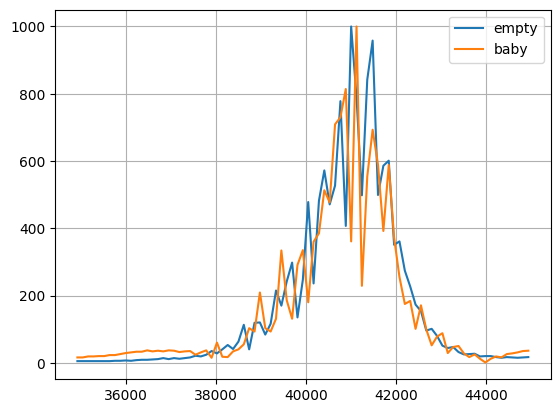

In [267]:
temp1 = totalfft.iloc[580,0:85] #First 1000 rows = empty
plotempty2 = temp1.T
temp2 = totalfft.iloc[1080,0:85] #Next 1000 rows = baby
plotbaby2 = temp2.T

f_fft = np.linspace(34928,44942,85)

plt.plot(f_fft,plotempty2,label = 'empty')
plt.plot(f_fft,plotbaby2,label = 'baby')
plt.grid(True)
plt.legend()
plt.show()

In [198]:
type(temp1)

pandas.core.series.Series

### Downsampling

In [64]:
downsampled = total2[total2.columns[::32]]
downsampled

,16,48,80,112,144,176,208,240,272,304,...,16112,16144,16176,16208,16240,16272,16304,16336,16368,Label
0,4.305237,-183.694763,141.305237,275.305237,395.305237,220.305237,-335.694763,-518.694763,5.305237,100.305237,...,13.305237,16.305237,-30.694763,7.305237,19.305237,-28.694763,22.305237,18.305237,-27.694763,0
1,15.768250,125.768250,-94.231750,-294.231750,-471.231750,-158.231750,433.768250,387.768250,-72.231750,121.768250,...,5.768250,-29.231750,18.768250,12.768250,-21.231750,18.768250,19.768250,-35.231750,14.768250,0
2,4.816833,-245.183167,88.816833,246.816833,404.816833,274.816833,-281.183167,-532.183167,-44.183167,95.816833,...,-7.183167,-20.183167,30.816833,-6.183167,-28.183167,25.816833,-3.183167,-28.183167,28.816833,0
3,-13.052856,139.947144,331.947144,329.947144,286.947144,-77.052856,-542.052856,-364.052856,231.947144,136.947144,...,-7.052856,-19.052856,28.947144,-2.052856,-27.052856,27.947144,4.947144,-28.052856,20.947144,0
4,7.011597,-126.988403,189.011597,289.011597,388.011597,186.011597,-371.988403,-507.988403,39.011597,106.011597,...,-16.988403,-10.988403,27.011597,-21.988403,-18.988403,30.011597,-15.988403,-17.988403,25.011597,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,-35.108215,-356.108215,48.891785,608.891785,189.891785,-146.108215,90.891785,-428.108215,-456.108215,522.891785,...,-35.108215,28.891785,-7.108215,-32.108215,30.891785,-0.108215,-33.108215,29.891785,6.891785,1
2396,-40.218506,-442.218506,-223.218506,495.781494,355.781494,-68.218506,175.781494,-272.218506,-664.218506,307.781494,...,-48.218506,9.781494,-55.218506,-48.218506,3.781494,-49.218506,-51.218506,16.781494,-43.218506,1
2397,-56.060486,-241.060486,245.939514,628.939514,50.939514,-207.060486,19.939514,-484.060486,-268.060486,633.939514,...,-29.060486,19.939514,0.939514,-32.060486,20.939514,11.939514,-44.060486,22.939514,20.939514,1
2398,-43.956604,-439.956604,-373.956604,376.043396,399.043396,-18.956604,218.043396,-125.956604,-711.956604,156.043396,...,17.043396,18.043396,-36.956604,13.043396,19.043396,-39.956604,10.043396,23.043396,-42.956604,1


In [39]:
downsampled.shape

(2180, 513)

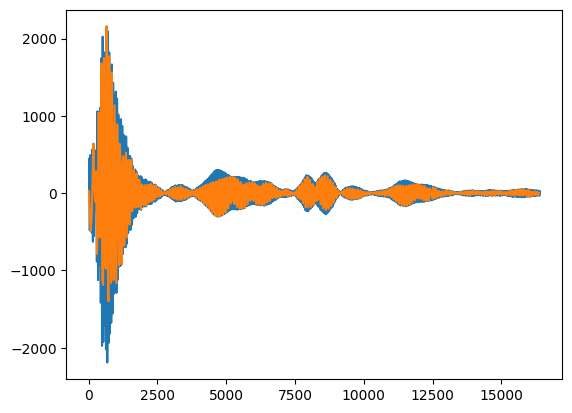

In [36]:
plt.plot(total2.iloc[0,0:16383])
plt.plot(downsampled.iloc[0,0:512])

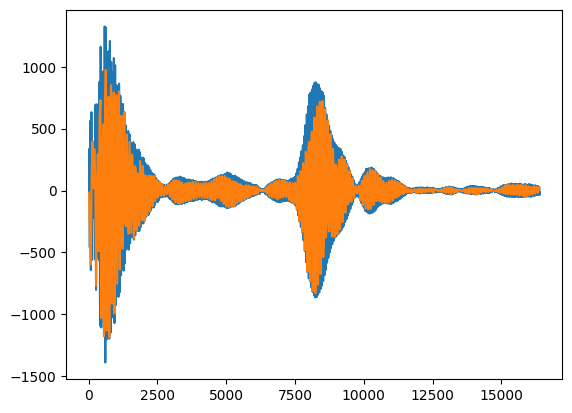

In [37]:
plt.plot(total2.iloc[2175,0:16383])
plt.plot(downsampled.iloc[2175,:512])